In [1]:
import numpy as np
import random
from itertools import product
from math import sqrt
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
rnd = np.random
rnd.seed(42) # Change seed value to randomise
# parameter
    
customers = [(0,1.5),(2.5,1.2)]
facilities = [(0,0),(0,1),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
setup_cost =  [20,20,20,20,20,20,20,20,20] #[3,2,3,1,3,3,4,3,2]
cost_per_mile = 1

In [2]:
xc = [0,2.5]
yc = [1.5,1.2]
xf = [0,0,1,1,1,2,2,2]
yf = [0,1,0,1,2,0,1,2]

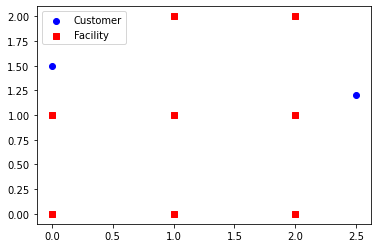

In [3]:
plt.scatter(xc[0:], yc[0:], c='b', label = 'Customer') # Customer
plt.scatter(xf[0:], yf[0:], c='r', marker='s', label = 'Facility') # Facility
plt.legend()
plt.show();

In [4]:
I = [c for c in xc] # Customer 
J = [f for f in yc] # Facility
A = [(c, f) for c in I for f in J]

In [5]:
# this function determines the euclidean distance between a facility and customer sites
def compute_distance(loc1, loc2):
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return sqrt(dx*dx + dy*dy)
# cumpte key parameters of MIP model formulation
num_facilities = len(facilities)
num_customers = len(customers)
cartesian_prod = list(product(range(num_customers), range(num_facilities)))
# cumpte shipping costs
shipping_cost = {(c,f): cost_per_mile*compute_distance(customers[c], facilities[f]) for c, f in cartesian_prod}

In [6]:
# MIP model foemulation 
m = gp.Model('facility_location')
select = m.addVars(num_facilities, vtype=GRB.BINARY, name='Select')
assing = m.addVars(cartesian_prod, ub=1, vtype=GRB.CONTINUOUS, name='Assing')
m.addConstrs((assing[(c,f)] <= select[f] for c,f in cartesian_prod), name='Setup2ship')
m.addConstrs((gp.quicksum(assing[(c,f)] for f in range(num_facilities))==1 for c in range(num_customers)), name='Demand')
m.setObjective(select.prod(setup_cost)+assing.prod(shipping_cost), GRB.MINIMIZE)
m.optimize()

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-05-28
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 18 rows, 24 columns and 48 nonzeros
Model fingerprint: 0x858306eb
Variable types: 16 continuous, 8 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 18 rows, 24 columns, 48 nonzeros
Variable types: 16 continuous, 8 integer (8 binary)
Found heuristic solution: objective 41.0385165

Root relaxation: objective 2.260007e+01, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Ga

In [7]:
for facility in select.keys():
    if(abs(select[facility].x) > 1e-6):
        print(f"\n n Build a warehouse at location {facility +1}.")


 n Build a warehouse at location 7.


In [8]:
for customer, facility in assing.keys():
    if(abs(assing[customer,facility].x) > 1e-6):
        print(f"\n Supermarket {customer +1} receives {round(100*assing[customer,facility].x, 2)} % of its demand from warehouse at location {facility +1}.")


 Supermarket 1 receives 100.0 % of its demand from warehouse at location 7.

 Supermarket 2 receives 100.0 % of its demand from warehouse at location 7.


In [9]:
assignment = [a for a in cartesian_prod if assing[a].X > 0.0 ]

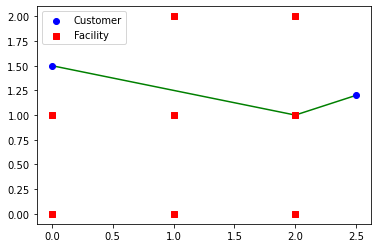

In [10]:
for c, f in assignment:
    plt.plot([xc[c], xf[f]], [yc[c], yf[f]], c='g', zorder=0)
plt.scatter(xc[0:], yc[0:], c='b', label = 'Customer')
plt.scatter(xf[0:], yf[0:], c='r',marker='s', label = 'Facility')
plt.legend()
plt.show();